# Perceptron Learning for Handwritten Digit Recognition

In this exercise you will implement the perceptron algorithm for training a perceptron to classify handwritten digits. 

We will use the ``sklearn`` version of the [MNIST data set](https://en.wikipedia.org/wiki/MNIST_database). 

You will need to complete **one line**, the gradient descent step, of a pre implemented perceptron training function. 

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

def perceptron_train(X_train,Y_train, X_val, Y_val, iterations=100,eta=.1):
    '''
    Trains a perceptron and returns the learning curve for train and validation set
    '''
    acc_train = np.zeros(iterations)
    acc_val = np.zeros(iterations)
    # initialize weight vector
    weights = np.random.randn(X_train.shape[1]) * 1e-5
    for it in np.arange(iterations):
        # indices of misclassified data
        wrong = (np.sign(X_train @ weights) != Y_train).nonzero()[0]
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            rand_ex = np.random.randint(0,wrong.shape[0])
            # update weight vector
            # INSERT YOUR CODE HERE
            weights += ...
            # compute accuracy
            acc_train[it] = np.mean(np.sign(X_train @ weights)==Y_train)
            acc_val[it] = np.mean(np.sign(X_val @ weights)==Y_val)
    # return weight vector and accuracy
    return acc_train, acc_val

## Test whether your code works: Handwritten digit recognition

Execute the following code and check whether the learning curves look like the model improves over time. 

Feel free to change the learning rate or the validation split and observe the effects on the model training. 

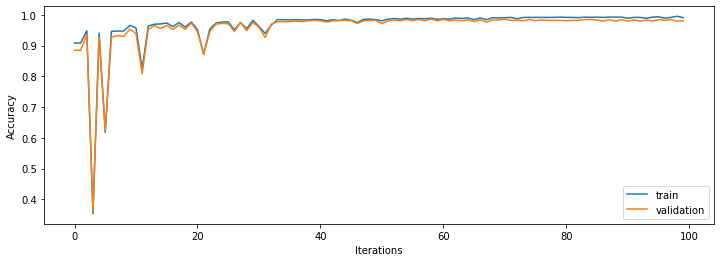

In [2]:
digit_to_recognize = 5
X, Y = load_digits(n_class=10, return_X_y=True)
# transform the 10-class labels into binary form
y = np.sign((Y==digit_to_recognize)* 1.0 - .5)
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=.4)
acc_train, acc_val = perceptron_train(X_train, Y_train, X_val, Y_val)

plt.figure(figsize=[12,4])
plt.plot(acc_train)
plt.plot(acc_val)
plt.xlabel("Iterations");plt.ylabel("Accuracy");plt.legend(['train','validation']);
